# Ejercicio 03
Vamos a empezar por comprender los datos: Estamos en una agencia de comercio internacional, y contamos con las variables: salarios emparentados con ventas por volúmen y la edad de los vendedores.

Vamos a empezar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

  Sexo  Edad  Total_Ventas  Salario
0    M    46         29800     4100
1    H    68         83000     8125
2    M    60         66400     5775
3    H    49         25900     3400
4    H    22             0     7075


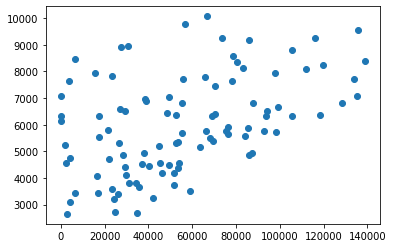

In [2]:
# Vamos a empezar por cargar y manipular los datos

data = pd.read_csv('datum-ej.csv')
print(data.head())
X = data.iloc[:,2:].values
#print(X)
x1 = X[:,0]
y1 = X[:,1]
plt.scatter(x1,y1)
plt.show()

# Clusterización por K-means en pocos pasos

C:\Users\Pelu\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


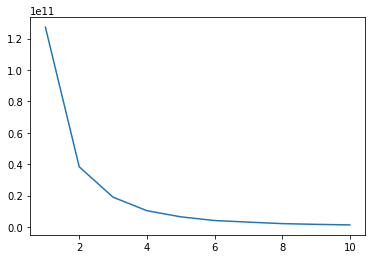

In [3]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)

# Gráfiquemos visualmento nuestros centroides y los clusters

[[ 21512.19512195   5185.36585366]
 [ 65460.97560976   6232.92682927]
 [113258.82352941   7382.35294118]]


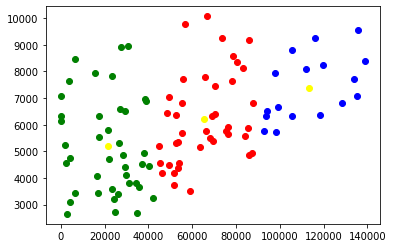

In [5]:
kmeans = KMeans( n_clusters = 3, init = 'k-means++')
kmeans.fit(X)
print(kmeans.cluster_centers_)

clusters = kmeans.fit_predict(X)
data["label"] = clusters
#print(clusters)

plt.scatter(data.Total_Ventas[data.label == 0 ],data.Salario[data.label == 0],color = "red")
plt.scatter(data.Total_Ventas[data.label == 1 ],data.Salario[data.label == 1],color = "green")
plt.scatter(data.Total_Ventas[data.label == 2 ],data.Salario[data.label == 2],color = "blue")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "yellow")
plt.show()